# Gaussian Beayesian estimation
An example for you to work through

In [1]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
def normal_update( mu_prior, mu_obs, std_prior, std_obs):
    '''
    Bayesian update of Normal dist parameter estimates
    '''
    a = 1./std_prior**2
    b = 1./std_obs**2
    mu_post = (a*mu_prior + b*mu_obs)/(a+b)
    std_post = 1./(a+b)
    
    return (mu_post, std_post)

In [3]:
# trying to model the age of students in a particular class

# we know that the age of students in a previous quarter was 
mu_prior = 22.8
std_prior = 2.63

# real params underlying the demographics of this class (in the long run over years)
mu_real = 21.7
std_real = 2.8

# data sample from real params... the students in this quarter's class!
sample = stats.norm.rvs(loc=mu_real, scale=std_real, size=(36,))
mu_obs = np.mean(sample)
std_obs = np.std(sample)

# our new belief in the true demographics
(mu_post, std_post) = normal_update(mu_prior, mu_obs, std_prior, std_obs )

#
print(f'previously we thought mu_prior={mu_prior:4.2f}, std_prior={std_prior:4.2f}')
print(f'this quarter mu_obs={mu_obs:4.2f}, std_obs={std_obs:4.2f}')
print(f'now we think mu_post={mu_post:4.2f}, std_post={std_post:4.2f}')
print(f'the truth is mu={mu_real:4.2f}, std={std_real:4.2f}')

previously we thought mu_prior=22.80, std_prior=2.63
this quarter mu_obs=21.47, std_obs=2.74
now we think mu_post=22.16, std_post=3.59
the truth is mu=21.70, std=2.80


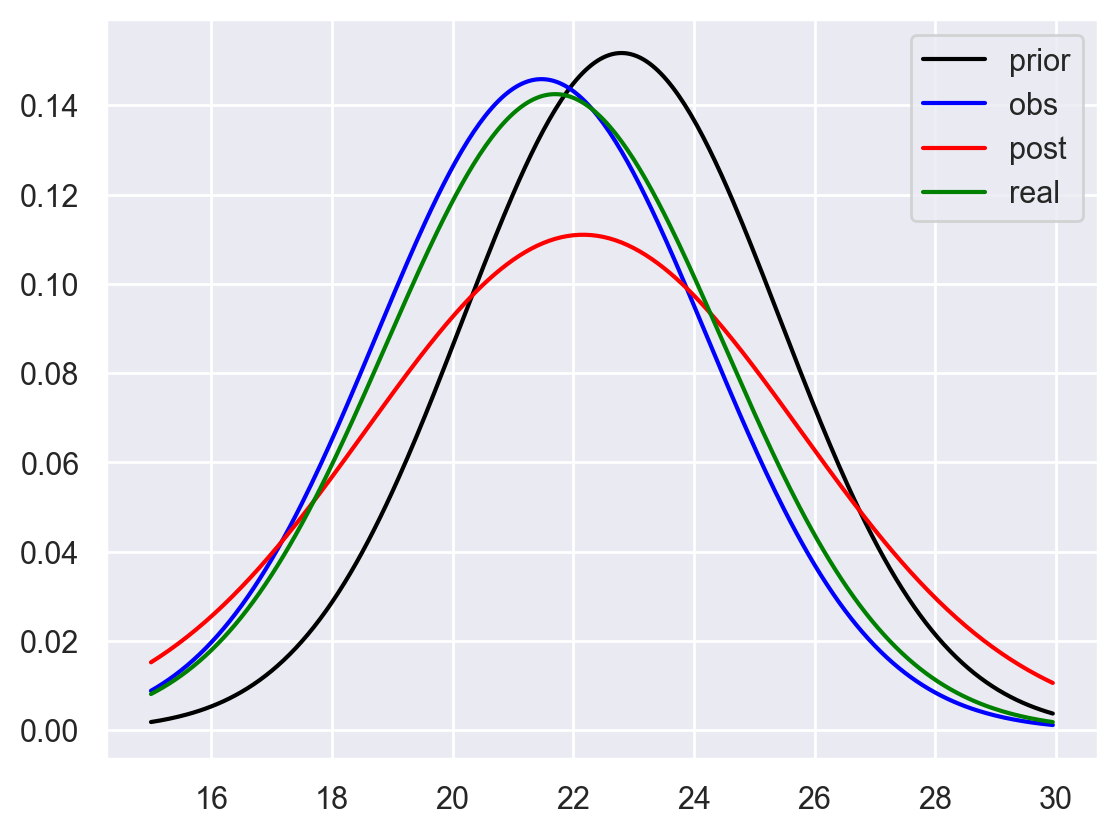

In [4]:
xvs = np.arange(15,30,0.05)
plt.plot( xvs, stats.norm.pdf(xvs,loc=mu_prior, scale=std_prior), label='prior', color='k')
plt.plot( xvs, stats.norm.pdf(xvs,loc=mu_obs, scale=std_obs), label='obs', color='b')
plt.plot( xvs, stats.norm.pdf(xvs,loc=mu_post, scale=std_post), label='post', color='r')
plt.plot( xvs, stats.norm.pdf(xvs,loc=mu_real, scale=std_real), label='real', color='g')
plt.legend();

In [6]:
## Now iterate.... draw the next 5 quarters of classes in the same way as above, 
## and see how our posterior estimate changes over time!!
for x in range(5):
    mu_prior = mu_post
    std_prior = std_post
    
    sample = stats.norm.rvs(loc=mu_real, scale=std_real, size=(36,))
    mu_obs = np.mean(sample)
    std_obs = np.std(sample)

    (mu_post, std_post) = normal_update(mu_prior, mu_obs, std_prior, std_obs )
    print(f'mu_post={mu_post:4.2f}, std_post={std_post:4.2f}')


mu_post=21.54, std_post=5.89
mu_post=21.83, std_post=5.95
mu_post=21.81, std_post=5.39
mu_post=20.95, std_post=6.11
mu_post=21.24, std_post=5.44
